Write a program to implement neural network on Solar dataset
1. Backpropogation neural netwrok and Adam optimizer
2. L1 & L2 regularization
3. Early stopping at p=5
4. Dropout at 0.2

In [3]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import time

In [4]:
sns.set_style('darkgrid')

colors = ["#9b5de5", "#f15bb5", "#fee440", "#00bbf9", "#00f5d4"]

In [5]:
# Load the Sonar dataset
X,y = make_classification(n_samples=208, n_features=60, n_informative=60, n_redundant=0, n_classes=2,random_state=42)
# Split the dataset into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [6]:
def SimpleSequentialModel():
        nn = tf.keras.models.Sequential([
            tf.keras.layers.Dense(32, input_dim=60, activation='relu'),
            tf.keras.layers.Dense(16, activation='relu'),
            tf.keras.layers.Dense(8, activation='relu'),
            tf.keras.layers.Dense(1, activation='sigmoid')
        ])

        nn._name = "SimpleSequentialModel"

        # Compile the model
        nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

        # show the model summary
        nn.summary()

        start = time.perf_counter()
        history = nn.fit(X_train,y_train, validation_split=0.1, epochs=200, verbose=0)
        end = time.perf_counter()

        

        # Plot the loss and accuracy of training and validation
        plt.figure(figsize=(12, 8))

        plt.subplot(221).set_title('Training Loss')
        plt.plot(history.history['loss'], label='train loss', color=colors[0])

        plt.subplot(222).set_title('Training Accuracy')
        plt.plot(history.history['accuracy'], label='train accuracy', color=colors[1])

        plt.subplot(223).set_title('Validation Loss')
        plt.plot(history.history['val_loss'], label='val loss', color=colors[2])

        plt.subplot(224).set_title('Validation Accuracy')
        plt.plot(history.history['val_accuracy'], label='val accuracy', color=colors[3])

        plt.suptitle(nn._name)
        plt.show()

        print(f"time : {end - start}s")
        loss, accuracy = nn.evaluate(X_test,y_test, verbose=0)
        print(f'Testing Accuracy: {round(accuracy * 100, 2)}%, Testing Loss: {round(loss, 2)}')

Model: "SimpleSequentialModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                1952      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 2,625
Trainable params: 2,625
Non-trainable params: 0
_________________________________________________________________


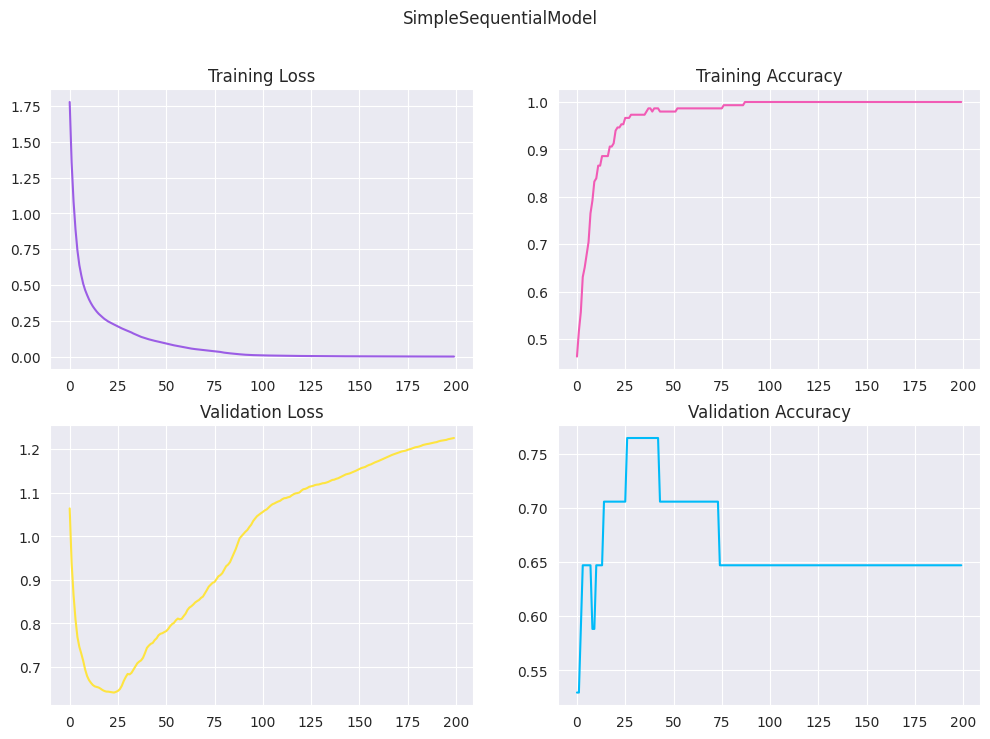

time : 15.857037655999989s
Testing Accuracy: 61.9%, Testing Loss: 1.21


In [7]:
SimpleSequentialModel()